## Import

In [ ]:
#Hodgkin-Huxley model of action potential
 
import numpy as np
import matplotlib.pyplot as plt

## Initialize

In [ ]:
# conductance for K, Na and R in mS/cm^2
g = np.asarray([36, 120, 0.3]) #Define an array of conductances for potassium, sodium, and leak ions
l = [r'$g_K$', r'$g_{Na}$', r'$g_L$'] #Define labels for conductances using LaTeX formatting

# Battery voltage for n, m and h
E = np.asarray([-12, 115, 10.613])#Define an array of battery voltages for potassium, sodium, and leak ions

In [ ]:

# Init of useful variables
##########################
I_ext = 0. #Set an initial value for the external current
I_ext_applied = 10 #Define the value of the applied external current

# initial membrane potential
V = -10
x = np.asarray([0., 0., 1.],dtype=np.float32) #Set initial values for the activation variables

#Define an array to store the alpha,beta and conductance values used in solving the differential equation
Alpha = np.zeros(3)
Beta = np.zeros(3)
gnmh = np.zeros(3)


# Time-step for the simulation
dt = 0.01

# Simulation time
ts = np.arange(-30, 50, dt) #Define an array of time values for the simulation
Vs = np.zeros_like(ts) #Define an array to store the membrane voltages over time
gnmhs = np.zeros((Vs.size, 3)) #Define an array to store the conductances over time
Is = np.zeros_like(ts) #Define an array to store the ionic currents over time

## Simulation

In [ ]:
#####################
## Start simulation
#####################
for i, t in enumerate(ts): #Iterate over each time step in the simulation,where i is the index of the current element and t is the value of the current element.
    if t>=40: #Check if the current time is greater than or equal to 40
        I_ext = 0
    elif t>=10.: #Check if the current time is greater than or equal to 10
        I_ext = I_ext_applied
        
    # Compute alpha and beta for solving differential eq
    Alpha[0] = (10-V)/(100*(np.exp((10-V)/10)-1)) #Calculate the alpha value for potassium activation
    Alpha[1] = (25-V)/(10*(np.exp((25-V)/10)-1))#for Sodium activation
    Alpha[2] = 0.07 * np.exp(-V/20)#for leak activation
    
    Beta[0] = 0.125 * np.exp(-V/80)#for potassium activation
    Beta[1] = 4 * np.exp(-V/18)#for Sodium activation
    Beta[2] = 1/(np.exp((30-V)/10)+1)#for leak activation
    
    # Solving first-order differential equation using simple Euler's method
    tau = 1 / (Alpha+Beta)#Calculate the time constant
    x_0 = Alpha * tau
    x = (1-dt/tau)*x+dt/tau*x_0
    
    # Compute conductances
    gnmh[0] = g[0]*(x[0]**4)
    gnmh[1] = g[1]*(x[1]**3)*x[2]
    gnmh[2] = g[2]
    
    
    # Now apply Ohm's law:
    I = gnmh * (V-E) #Calculate the membrane current I
    
    # and update now the membrane voltage
    V = V + dt * (I_ext - I.sum())#where I_ext is the applied external current and I.sum() is the sum of the membrane currents.

    # Save conductances and voltages
    gnmhs[i] = gnmh
    Vs[i] = V

# Plot results

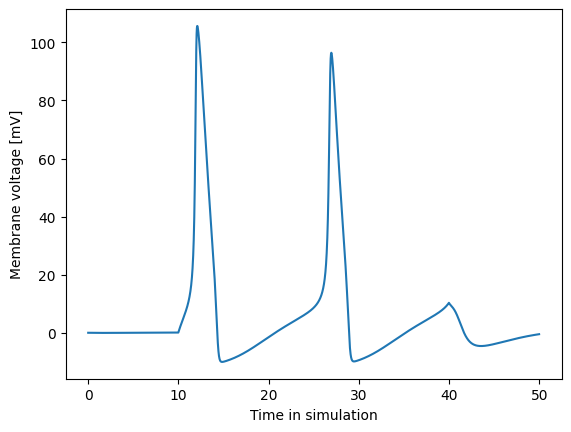

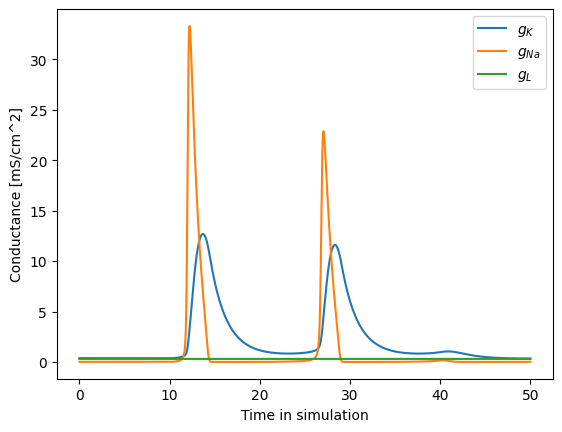

In [ ]:
plt.figure()
plt.plot(ts[ts>0], Vs[ts>0])#Plot the membrane potential over time
plt.xlabel("Time in simulation")
plt.ylabel("Membrane voltage [mV]")
plt.figure()
for i in range(3):
    plt.plot(ts[ts>0], gnmhs[:,i][ts>0], label=l[i])#Plot the conductance over time
    
plt.xlabel("Time in simulation")
plt.ylabel("Conductance [mS/cm^2]")
plt.legend(loc='best')

Python code adapted from Trappenberg, Fundamentals of Computational Neuroscience

The code imports the NumPy and Matplotlib libraries and initializes variables related to a simulation of the Hodgkin-Huxley model of action potentials. The conductances for potassium (K), sodium (Na), and leak (L) ions are set, as well as the battery voltages for each ion. The simulation is conducted over a specified time period using a first-order differential equation solved with Euler's method. The conductances and voltage over time are plotted at the end of the simulation.